In [ ]:
from dataloaders import labeler_download_lot, ImageMaskDataloader
from dataloaders.io import labeler_image_mask_load_fun
import cv2
import json
import pprint as pp
import numpy as np

json_file_path = "data/20210511_seg-batch-68-2021-05-11.json"
image_folder, mask_folder  = labeler_download_lot(json_file_path, only_labels=True)

def my_load_fun(dim):
    def f(image_mask_path):
        image, mask = labeler_image_mask_load_fun(image_mask_path)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        mask = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)
        return image, mask
    return f

ds = ImageMaskDataloader(image_folder, mask_folder, image_prefix="", mask_prefix="", image_suffix=".png", mask_suffix=".json",
                         image_mask_load_fun=my_load_fun([512,512]), image_mask_transform=None)

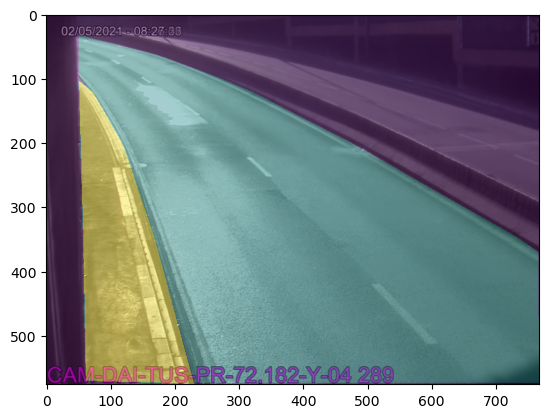

In [6]:
import matplotlib.pyplot as plt
image, mask = ds[np.random.randint(len(ds))]
plt.imshow(image)
plt.imshow(mask, alpha=0.4)